In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def P_vanW(V, T):
    R = 0.0831446261815324  # L⋅bar⋅K−1⋅mol−1
    a = 1.38169  # bar L^2/mol
    b = 0.0387  # L/mol
    p = (R*T/(V-b)) - (a/V**2)
    return p

Text(0, 0.5, 'P')

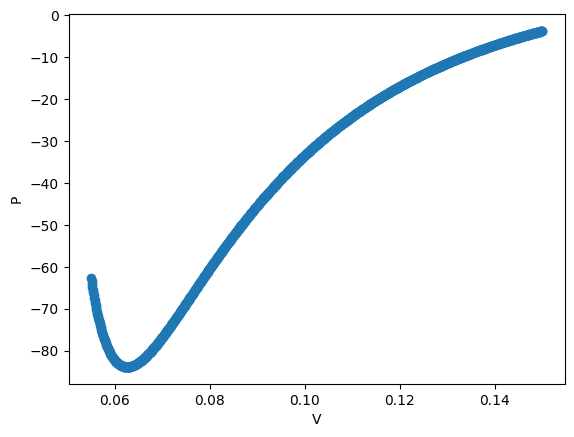

In [127]:
v_min = 0.055  # L/mol
v_max = 0.15  # L/mol
delta_v = 1E-5
n_points = 1000

v_grid = np.linspace(v_min, v_max, n_points)

T = 77.25
p = P_vanW(v_grid, T)
plt.scatter(v_grid, p)
plt.xlabel('V')
plt.ylabel('P')

In [128]:
v_grid0 = v_grid.copy()
np.random.shuffle(v_grid0)
print(v_grid0)
p_grid0 = P_vanW(v_grid0,T)

[0.12641642 0.05984985 0.07202202 0.14201201 0.06479479 0.0743994
 0.0608008  0.11548048 0.12394394 0.1170971  0.09142142 0.14648148
 0.0646046  0.06774274 0.14087087 0.13744745 0.07306807 0.10492492
 0.14895395 0.1344044  0.05965966 0.11576577 0.08238739 0.08058058
 0.08039039 0.11082082 0.0957958  0.11728729 0.05642643 0.13773273
 0.06973974 0.10872873 0.14153654 0.1131982  0.0782983  0.06717217
 0.08162663 0.14096597 0.07316316 0.08495495 0.0666967  0.08628629
 0.12204204 0.06726727 0.12318318 0.09208709 0.1344995  0.13221722
 0.0724024  0.14476977 0.08923423 0.08295796 0.11015516 0.1441041
 0.09731732 0.06213213 0.118999   0.13934935 0.09199199 0.12917417
 0.11348348 0.06118118 0.05756757 0.11633634 0.13915916 0.10521021
 0.07934434 0.09722222 0.13877878 0.08894895 0.14686186 0.06983483
 0.0705005  0.13478478 0.07211712 0.14914414 0.13896897 0.06783784
 0.07126126 0.0898048  0.14505506 0.0685986  0.10644645 0.09465465
 0.10825325 0.14724224 0.12898398 0.08514515 0.06878879 0.072592

In [174]:
n = 4
# x = v_grid[:n]
x = np.linspace(0.06, v_max, n) + np.random.uniform(-1E-3, 1E-3, size=(n,))
x = np.round(x, 5)
y = P_vanW(x, T)
y = np.round(y, 2)
print(x.shape,y.shape)
print(x,y)

(4,) (4,)
[0.05938 0.0895  0.12032 0.15037] [-81.27 -46.05 -16.75  -3.59]


In [207]:
x = np.array([0.05938, 0.0895,  0.12032, 0.15037])
x = np.round(x, 3)
y = P_vanW(x, T)
y = np.round(y, 2)
print(x)
print(y)

[0.059 0.09  0.12  0.15 ]
[-80.52 -45.38 -16.95  -3.7 ]


In [208]:
# x_poly = x.reshape(-1,1)
x_poly = np.ones((x.shape[0],1))
for i in range(1,4):
    x_p = x**i
    x_poly = np.hstack((x_poly, x_p.reshape(-1, 1)))

In [209]:
x_poly

array([[1.00000e+00, 5.90000e-02, 3.48100e-03, 2.05379e-04],
       [1.00000e+00, 9.00000e-02, 8.10000e-03, 7.29000e-04],
       [1.00000e+00, 1.20000e-01, 1.44000e-02, 1.72800e-03],
       [1.00000e+00, 1.50000e-01, 2.25000e-02, 3.37500e-03]])

In [211]:

w = np.linalg.lstsq(x_poly,y)[0]
print(w)

def f(v):
    x_poly_new = np.ones((1))
    for i in range(1,4):
        x_p = v**i
        x_poly_new = np.hstack((x_poly_new, x_p))
    return np.dot(w,x_poly_new)

y_pred = []
for vi in v_grid:
    yi = f(vi)
    y_pred.append(yi)
y_pred = np.asanyarray(y_pred)

[  -125.86572457    215.02169715  12874.28342854 -59187.82433854]


(1000,) (1000,)


Text(0, 0.5, 'P')

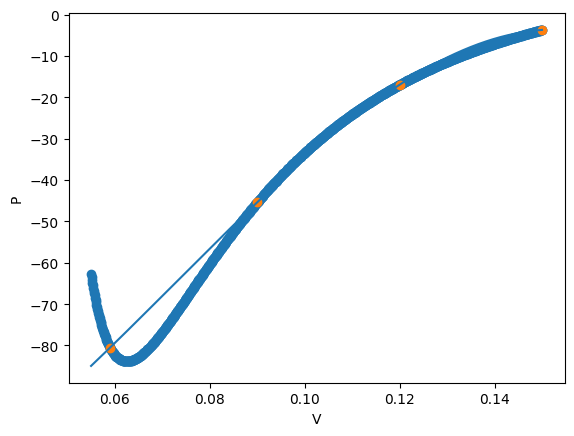

In [212]:
print(v_grid.shape, y_pred.shape)
plt.scatter(v_grid, p)
plt.plot(v_grid, y_pred)
plt.scatter(x,y)
plt.xlabel('V')
plt.ylabel('P')

In [216]:
y_pred = []
for vi in x:
    yi = f(vi)
    y_pred.append(yi)
y_pred = np.asanyarray(y_pred)

print(x)
print(y)
print(np.round(y_pred,2))
print(w)

[0.059 0.09  0.12  0.15 ]
[-80.52 -45.38 -16.95  -3.7 ]
[-80.52 -45.38 -16.95  -3.7 ]
[  -125.86572457    215.02169715  12874.28342854 -59187.82433854]


In [217]:
x_poly = np.ones((x.shape[0], 1))
for i in range(1,4):
    x_p = x**i
    x_poly = np.hstack((x_poly, x_p.reshape(-1, 1)))
print(x_poly)

[[1.00000e+00 5.90000e-02 3.48100e-03 2.05379e-04]
 [1.00000e+00 9.00000e-02 8.10000e-03 7.29000e-04]
 [1.00000e+00 1.20000e-01 1.44000e-02 1.72800e-03]
 [1.00000e+00 1.50000e-01 2.25000e-02 3.37500e-03]]


# Extra example

In [223]:
x = np.array([1, 2, 3, 4 ]) 
y = np.array([5.5, 43.1, 128,290.7])


x_poly = np.ones((x.shape[0], 1))
for i in range(1, 4):
    x_p = x**i
    x_poly = np.hstack((x_poly, x_p.reshape(-1, 1)))
print(x_poly)

w = np.linalg.lstsq(x_poly, y)[0]
print(w)


def f(v):
    x_poly_new = np.ones((1))
    for i in range(1, 4):
        x_p = v**i
        x_poly_new = np.hstack((x_poly_new, x_p))
    return np.dot(w, x_poly_new)


y_pred = []
for vi in x:
    yi = f(vi)
    y_pred.append(yi)
y_pred = np.asanyarray(y_pred)
print(y_pred)

[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]
[-15.3         22.56666667  -6.85         5.08333333]
[  5.5  43.1 128.  290.7]
